In [1]:
import nibabel as nb
import numpy as np
import Functional_Fusion.atlas_map as am
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import SUITPy as suit 
import nitools as nt 
import Functional_Fusion.plot as plot
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sb
from scipy import stats
base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion' 
atlas_dir = base_dir + '/Atlases/tpl-MNI152NLin2009cSymC'



In [8]:
wk_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/atlases'

all_o = np.load(f"{wk_dir}/olive/Prob_olive.npy")
mdtb_o = np.load(f"{wk_dir}/olive/Prob_olive_mdtb(ses1).npy")  
pontine_o = np.load(f"{wk_dir}/olive/Prob_olive_mdtb(high-res).npy")
lang_o = np.load(f"{wk_dir}/olive/Prob_olive_language.npy")
mdtb2_o = np.load(f"{wk_dir}/olive/Prob_olive_mdtb(ses2).npy")
print(all_o.shape)

all = np.load(f"{wk_dir}/thalamus/Prob_thalamus.npy")
mdtb = np.load(f"{wk_dir}/thalamus/Prob_thalamus_mdtb(ses1).npy")  
pontine = np.load(f"{wk_dir}/thalamus/Prob_thalamus_mdtb(high-res).npy")
lang = np.load(f"{wk_dir}/thalamus/Prob_thalamus_language.npy")
mdtb2 = np.load(f"{wk_dir}/thalamus/Prob_thalamus_mdtb(ses2).npy")
print(all.shape)


d_all = np.load(f"{wk_dir}/dentate/Prob_dentate.npy")
d_mdtb = np.load(f"{wk_dir}/dentate/Prob_dentate_mdtb(ses1).npy")  
d_pontine = np.load(f"{wk_dir}/dentate/Prob_dentate_mdtb(high-res).npy")
d_lang = np.load(f"{wk_dir}/dentate/Prob_dentate_language.npy")
d_mdtb2 = np.load(f"{wk_dir}/dentate/Prob_dentate_mdtb(ses2).npy")
print(d_all.shape)

all_r = np.load(f"{wk_dir}/rednucleus/Prob_rednucleus.npy")
mdtb_r = np.load(f"{wk_dir}/rednucleus/Prob_rednucleus_mdtb(ses1).npy")  
pontine_r = np.load(f"{wk_dir}/rednucleus/Prob_rednucleus_mdtb(high-res).npy")
lang_r = np.load(f"{wk_dir}/rednucleus/Prob_rednucleus_language.npy")
mdtb2_r = np.load(f"{wk_dir}/rednucleus/Prob_rednucleus_mdtb(ses2).npy")
print(all_r.shape)

all_p = np.load(f"{wk_dir}/pontine/Prob_pontine.npy")
mdtb_p = np.load(f"{wk_dir}/pontine/Prob_pontine_mdtb(ses1).npy")  
pontine_p = np.load(f"{wk_dir}/pontine/Prob_pontine_mdtb(high-res).npy")
lang_p = np.load(f"{wk_dir}/pontine/Prob_pontine_language.npy")
mdtb2_p = np.load(f"{wk_dir}/pontine/Prob_pontine_mdtb(ses2).npy")
print(all_p.shape)





(32, 1448)
(32, 25640)
(32, 3934)
(32, 900)
(32, 11239)


All


/Users/incehusain/Documents/GitHub/Pontine7T/env/lib/python3.9/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


AttributeError: module 'Functional_Fusion.plot' has no attribute 'plot_olive2'

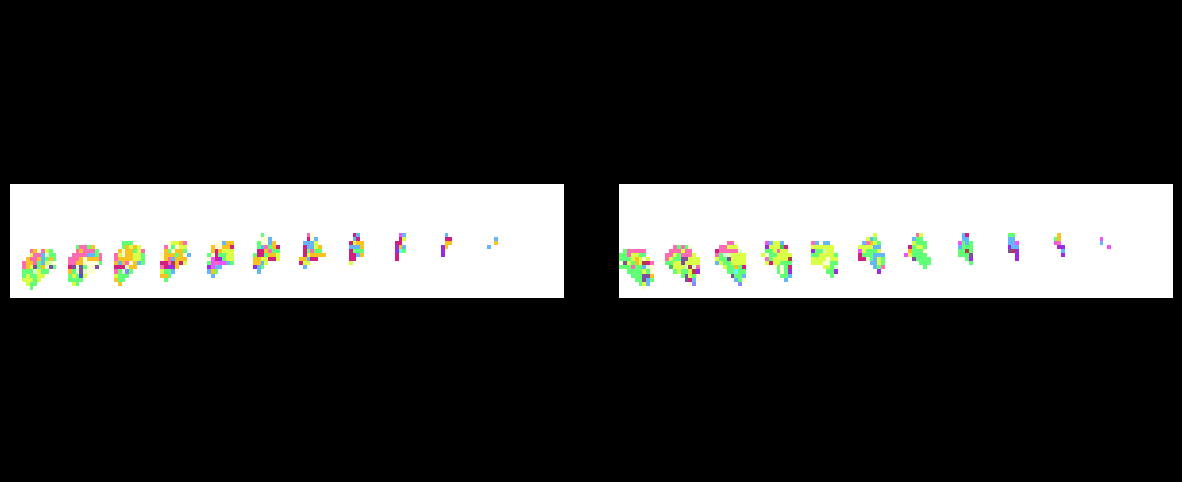

In [9]:
olive_maps = [all_o, mdtb_o, pontine_o, lang_o, mdtb2_o]

titles = ['All', 'MDTB_ses1', 'HighRes_MDTB', 'Language', 'MDTB_ses2']

lid,cmap,names = nt.read_lut('/Volumes/diedrichsen_data$/data/FunctionalFusion/Atlases/tpl-MNI152NLin2009cSymC/atl-NettekovenSym32.lut')

for i, pmap in enumerate(olive_maps):
    print(titles[i])
    wta = np.argmax(pmap, axis=0) + 1
    wta_int32 = wta.astype(np.int32)
    thalamus_parcellation = plot.plot_olive(wta_int32, cscale=[0,32], cmap=cmap)
    thalamus_parcellation = plot.plot_olive2(wta_int32, cscale=[0,32], cmap=cmap)
    plt.show()



All


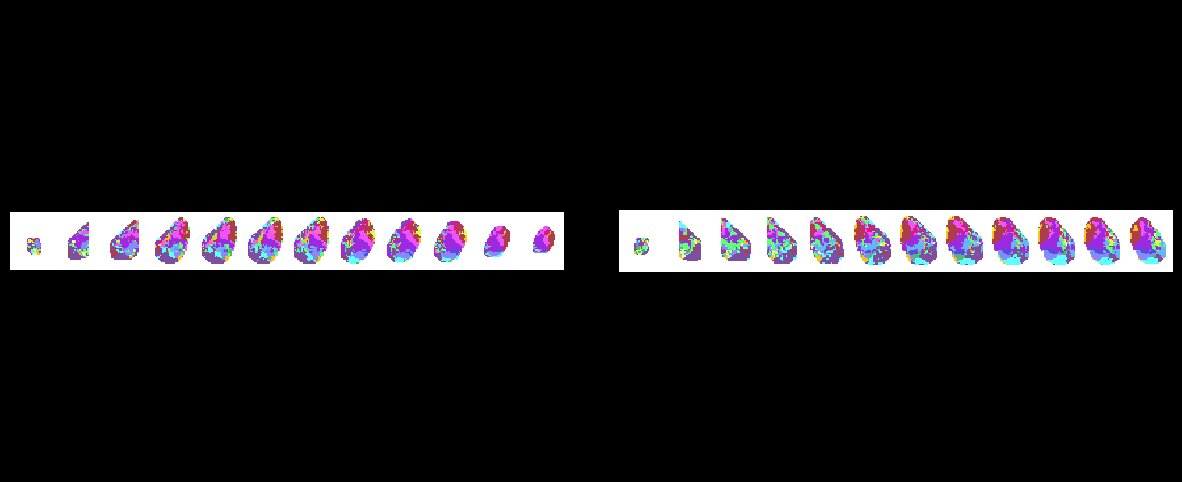

MDTB_ses1


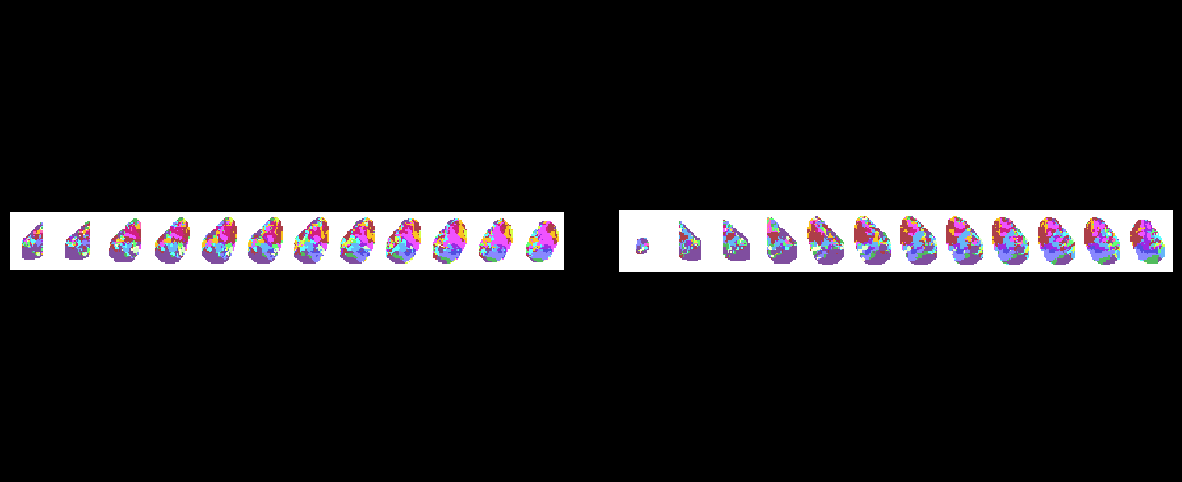

HighRes_MDTB


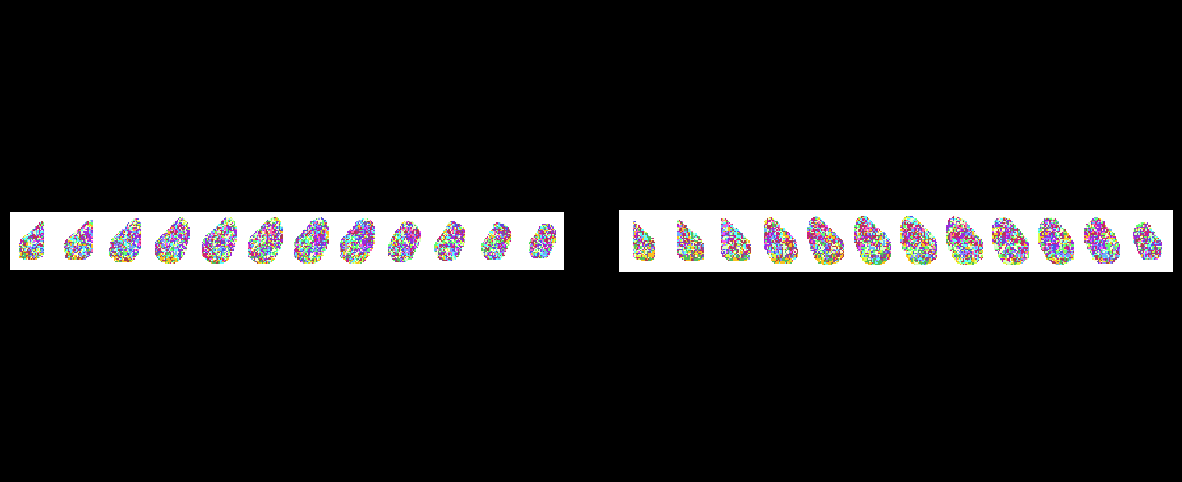

Language


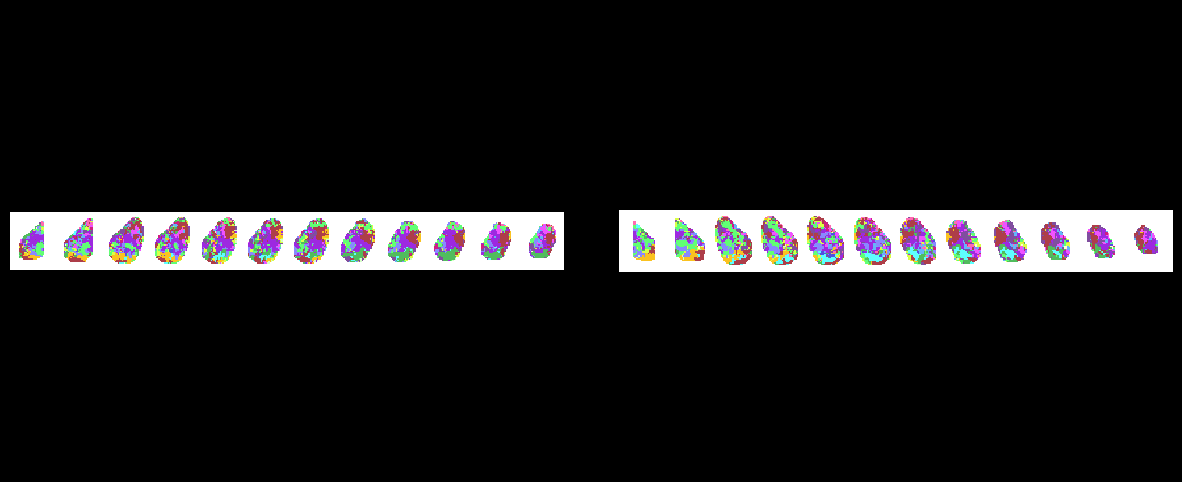

MDTB_ses2


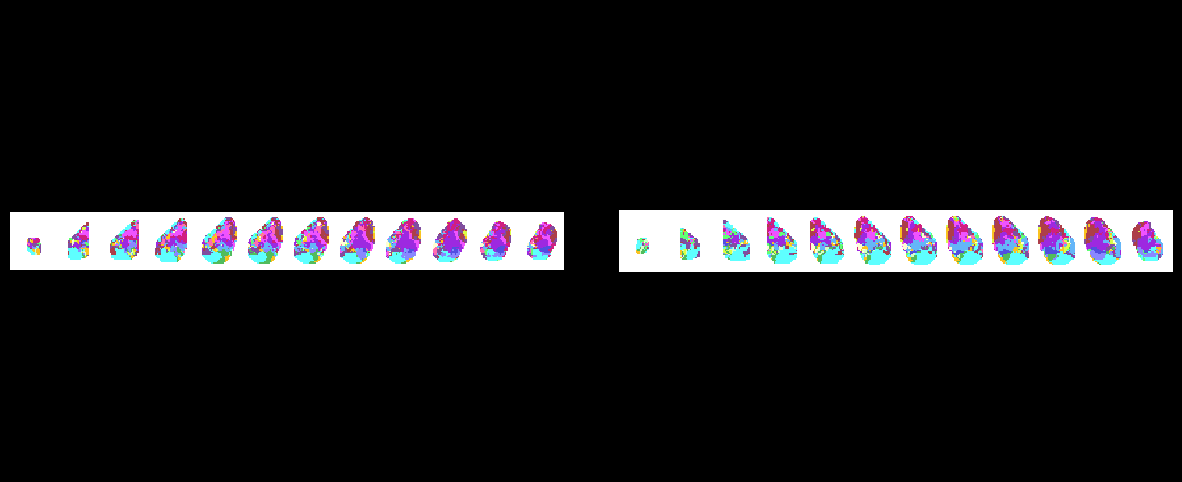

In [3]:
thalamus_maps = [all, mdtb, pontine, lang, mdtb2]
titles = ['All', 'MDTB_ses1', 'HighRes_MDTB', 'Language', 'MDTB_ses2']

lid,cmap,names = nt.read_lut('/Volumes/diedrichsen_data$/data/FunctionalFusion/Atlases/tpl-MNI152NLin2009cSymC/atl-NettekovenSym32.lut')

for i, pmap in enumerate(thalamus_maps):
    print(titles[i])
    wta = np.argmax(pmap, axis=0) + 1
    wta_int32 = wta.astype(np.int32)
    thalamus_parcellation = plot.plot_thalamus(wta_int32, cscale=[0,32], cmap=cmap)
    plt.show()



All


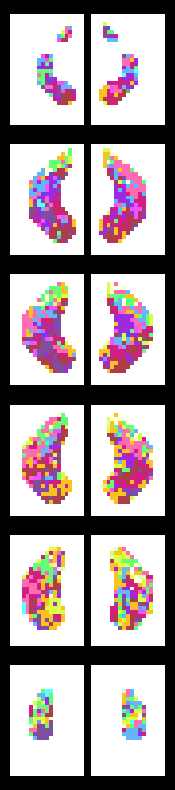

MDTB_ses1


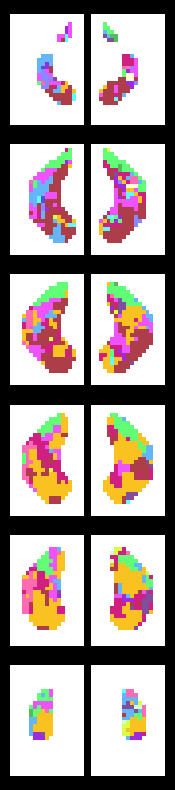

HighRes_MDTB


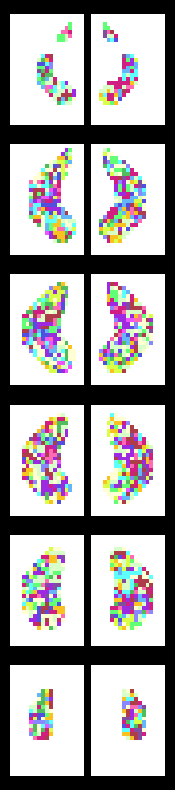

Language


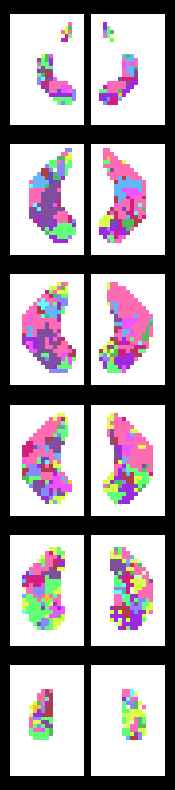

MDTB_ses2


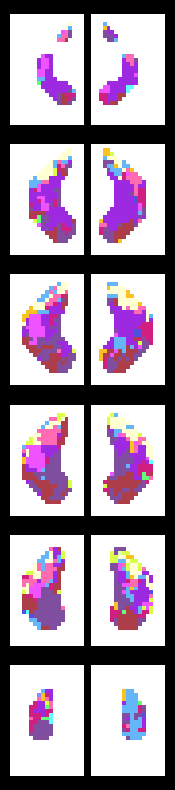

In [6]:
dentate_maps = [d_all, d_mdtb, d_pontine, d_lang, d_mdtb2]
titles = ['All', 'MDTB_ses1', 'HighRes_MDTB', 'Language', 'MDTB_ses2']

lid,cmap,names = nt.read_lut('/Volumes/diedrichsen_data$/data/FunctionalFusion/Atlases/tpl-MNI152NLin2009cSymC/atl-NettekovenSym32.lut')

for i, pmap in enumerate(dentate_maps):
    print(titles[i])
    wta = np.argmax(pmap, axis=0) + 1
    wta_int32 = wta.astype(np.int32)
    thalamus_parcellation = plot.plot_dentate(wta_int32, cscale=[0,32], cmap=cmap)
    plt.show()



All


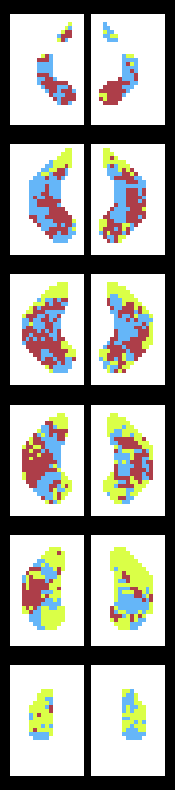

MDTB_ses1


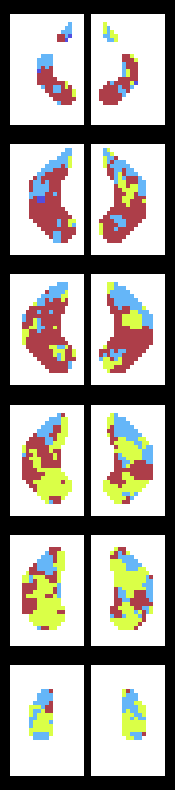

Pontine7T


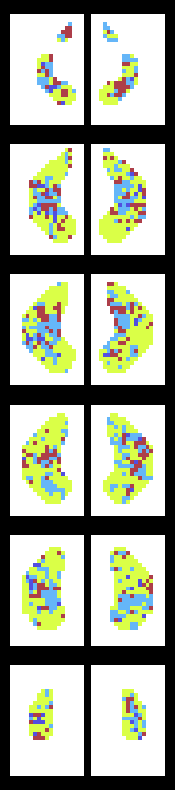

Language


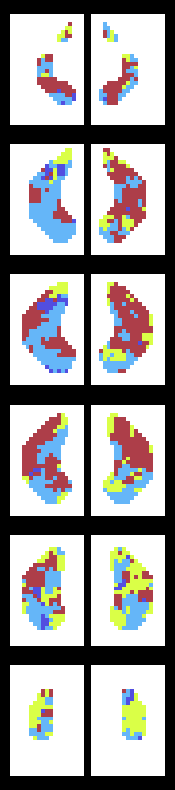

MDTB_ses2


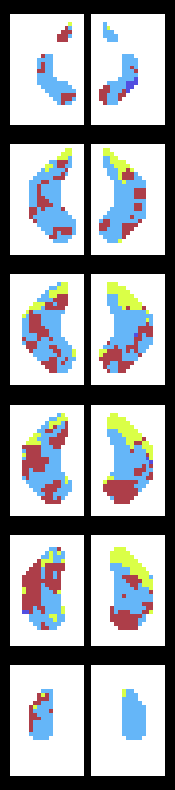

In [5]:
#5 regions amalgamation

dentate_maps = [all_5, mdtb_5, pontine_5, lang_5, mdtb2_5]
titles = ['All', 'MDTB_ses1', 'Pontine7T', 'Language', 'MDTB_ses2']

lid,cmap,roi_names = nt.read_lut('/Volumes/diedrichsen_data$/data/FunctionalFusion/Atlases/tpl-MNI152NLin2009cSymC/atl-NettekovenSym32.lut')

new_labels = ['0','M','A','D','S'] 


for i, pmap in enumerate(dentate_maps):
    print(titles[i])
    new_cmap = cmap[[0,3,6,8,13],:]
    wta = np.argmax(pmap, axis=0) 
    wta += 1
    wta_int32 = wta.astype(np.int32)
    dentate_parcellation = plot.plot_dentate(wta_int32,cscale=[0,5],cmap=new_cmap)
    plt.show()

#0, M (3: blue), A (6: dark blue), D (8: maroon), S (13: yellow)

